# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed using a method called recursive partitioning. The algorithm starts with the full dataset and chooses the feature and value that best splits the data based on some criteria like Gini impurity or information gain. It continues splitting each resulting subset of the data in the same way, creating a tree-like structure of decisions, until it reaches stopping conditions such as maximum depth, minimum number of samples per node, or pure leaf nodes.

2. Trees handle non-linear relationships very well because they make decisions by splitting the data at different thresholds, which creates piecewise constant regions in the feature space. This means they can model complex and irregular patterns. In contrast, linear models assume a straight-line relationship between features and the target, which makes them unsuitable for non-linear data unless you manually transform the features.

3. The Gini impurity is a good loss function for categorical target variables because it measures how mixed the classes are in a node. A lower Gini score means the node is more pure, containing mostly one class. It helps the tree algorithm decide where to split the data in a way that makes the resulting nodes more homogenous, which usually improves classification accuracy.

4. Trees tend to overfit because they can keep splitting the data until each leaf node perfectly matches the training samples, including noise and outliers. This makes them very accurate on the training set but poor at generalizing to new data. To reduce this overfitting, you can use techniques like limiting the maximum depth of the tree, setting a minimum number of samples required to make a split, pruning back parts of the tree, or using ensemble methods like Random Forests and Gradient Boosting.

5. False. Trees do perform well with categorical variables, but they also handle numerical variables effectively. They can find split points on continuous data and work well with a mix of variable types. Their performance depends more on the structure and patterns in the data than on whether the variables are categorical or numerical.

6. Most versions of classification or regression trees use binary splits because they are simpler to compute, easier to interpret, and generally more effective at creating pure subsets. Allowing more than two branches can make the tree more complex, harder to manage, and less efficient at improving classification or regression performance.

7. You can check for overfitting by looking at whether the tree is very deep, has many small leaf nodes, or performs extremely well on training data but poorly on test data. Underfitting might show up if the tree is very shallow, with very few splits, and it fails to capture patterns in the data, leading to low accuracy on both training and test sets. Comparing training and validation performance is a way to get a sense of whether the model is over- or under-fitting.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [1]:
#1
import pandas as pd

# Load data
df = pd.read_csv('./data/cars_hw.csv')

# Number of observations and features
n_obs, n_features = df.shape
print(f"Observations: {n_obs}, Features: {n_features}")
print("Available variables:", df.columns.tolist())

# First few rows
print(df.head())


Observations: 976, Features: 12
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    pe

In [4]:
#2
from sklearn.model_selection import train_test_split

print(df.columns.tolist())


# Define variables based on column names
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

# One-hot encode categorical variables and include numeric ones + target
df_encoded = pd.get_dummies(df[categorical_vars + numeric_vars + [target_var]], drop_first=True)

# Split into features and target
X = df_encoded.drop(columns=[target_var])
y = df_encoded[target_var]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


In [5]:
#3
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

r2_scores = []
min_leaf_range = range(1, 26)

for min_leaf in min_leaf_range:
    tree = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Find best min_samples_leaf
best_leaf = min_leaf_range[r2_scores.index(max(r2_scores))]
print(f"Best min_samples_leaf: {best_leaf}, R^2: {max(r2_scores)}")


Best min_samples_leaf: 5, R^2: 0.8253410511223336


R^2 (test): 0.8253410511223336
RMSE (test): 141536.54096868183


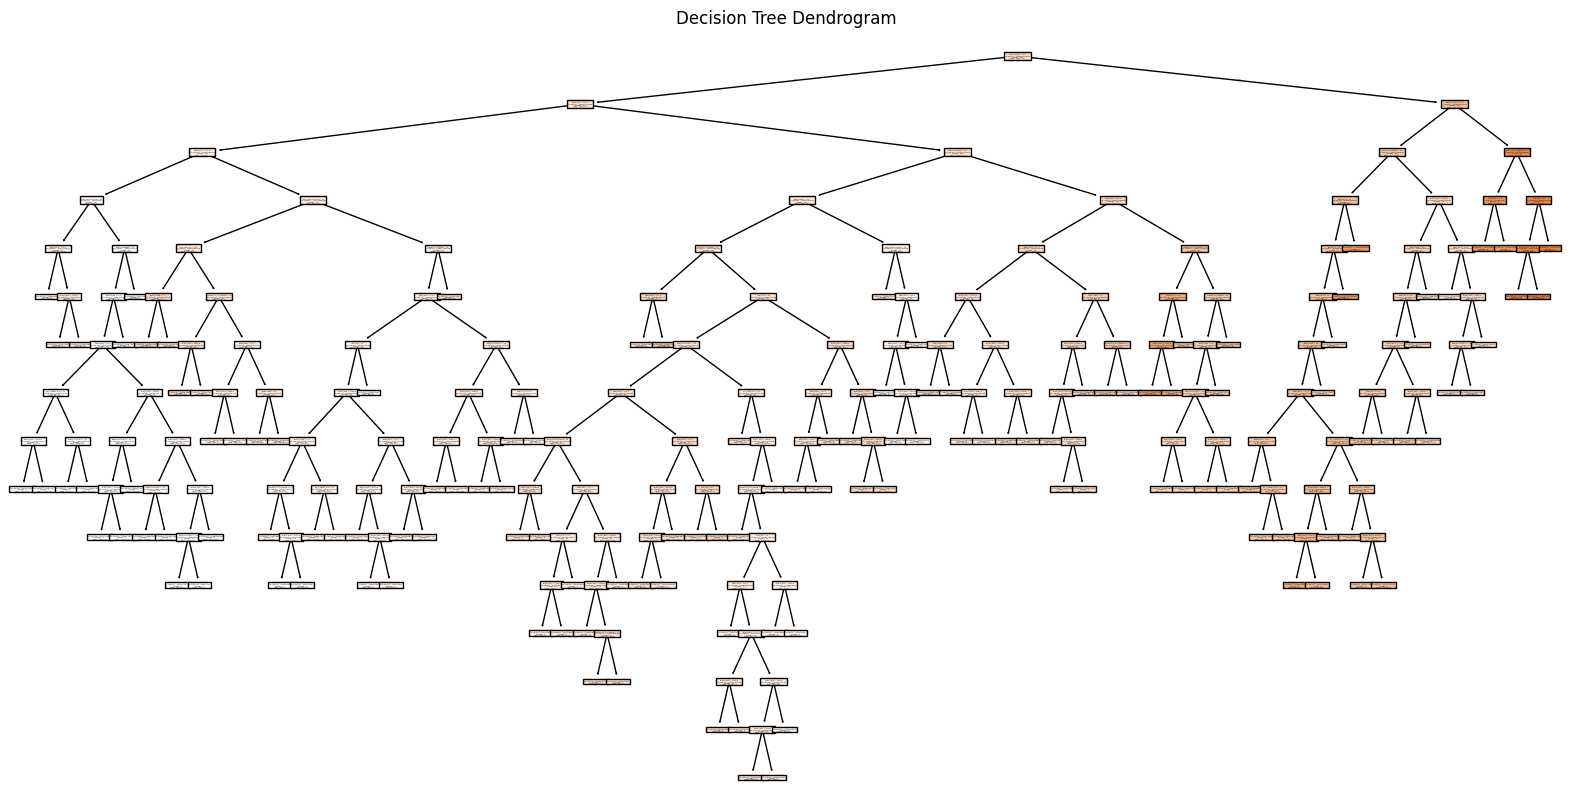

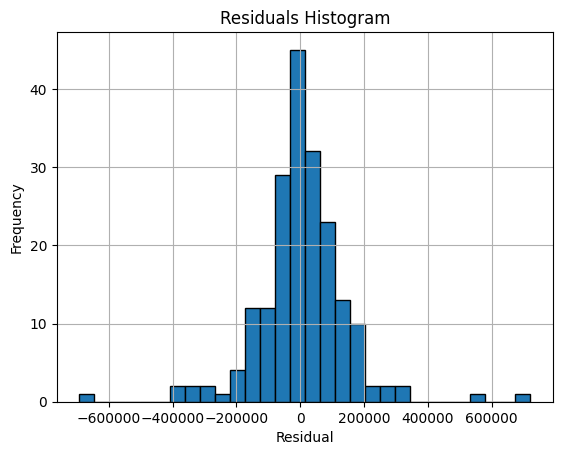

In [6]:
#4
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import plot_tree

# Train best model
best_tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_tree.fit(X_train, y_train)

# Predictions and metrics
y_pred_tree = best_tree.predict(X_test)
r2 = r2_score(y_test, y_pred_tree)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"R^2 (test): {r2}")
print(f"RMSE (test): {rmse}")

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Dendrogram")
plt.show()

# Plot residuals
residuals = y_test - y_pred_tree
plt.figure()
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


The residuals are roughly symmetric and centered, but there is a slight left skew.

In [7]:
#5
from sklearn.linear_model import LinearRegression

# Linear model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

# Metrics
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Linear Regression R^2: {r2_lin}")
print(f"Linear Regression RMSE: {rmse_lin}")


Linear Regression R^2: 0.8202733305970812
Linear Regression RMSE: 143575.196606625


The decision tree model performed slightly better than linear regression, with a higher R² (0.8253 vs. 0.8203) and a lower RMSE (141,536 vs. 143,575). This suggests the tree captured non-linear relationships in the data that the linear model couldn't. While both models performed similarly, the tree had a slight edge in predictive accuracy.

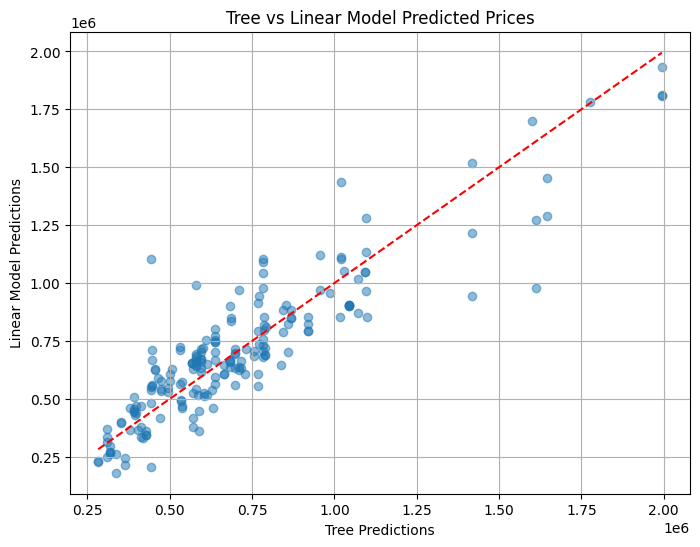

In [8]:
#6

# Compare predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_tree, y_pred_lin, alpha=0.5)
plt.xlabel("Tree Predictions")
plt.ylabel("Linear Model Predictions")
plt.title("Tree vs Linear Model Predicted Prices")
plt.grid(True)
plt.plot([y_pred_tree.min(), y_pred_tree.max()], [y_pred_tree.min(), y_pred_tree.max()], 'r--')
plt.show()


The scatter plot shows that the tree and linear model predictions are generally similar, with most points clustered around the diagonal line. However, there are some differences at the higher price range. This suggests that the decision tree captures some non-linear patterns that the linear model misses

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [10]:
#1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

df = pd.read_csv('./data/corporate_ratings.csv')
n_obs, n_features = df.shape
print(f"Observations: {n_obs}, Features: {n_features}")

print("First few rows:")
print(df.head())

Observations: 2029, Features: 31
First few rows:
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTa

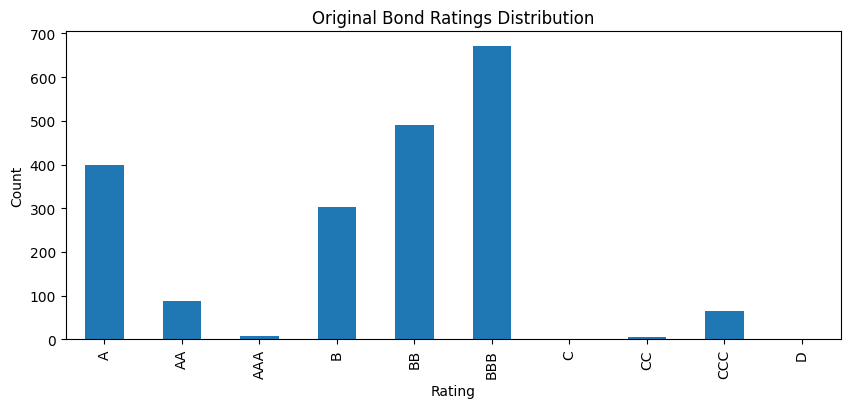

In [11]:
#2
plt.figure(figsize=(10, 4))
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Original Bond Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Collapse ratings: AAA/AA/A -> A, BBB/BB/B -> B, CCC/CC/C -> C, D stays as D
def collapse_rating(r):
    if r in ['AAA', 'AA', 'A']:
        return 'A'
    elif r in ['BBB', 'BB', 'B']:
        return 'B'
    elif r in ['CCC', 'CC', 'C']:
        return 'C'
    elif r == 'D':
        return 'D'
    else:
        return None

df['RatingCollapsed'] = df['Rating'].apply(collapse_rating)
# Drop any rows with unknown ratings
df = df.dropna(subset=['RatingCollapsed'])  


In [12]:
#3
drop_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
features = df.drop(columns=drop_cols + ['RatingCollapsed'], errors='ignore')

features = pd.get_dummies(features, columns=['Sector'], drop_first=True)

X = features
y = df['RatingCollapsed']

Collapsed rating distribution:
 RatingCollapsed
B    1463
A     494
C      71
D       1
Name: count, dtype: int64
New class distribution:
 RatingCollapsed
B    1463
A     494
C      71
Name: count, dtype: int64


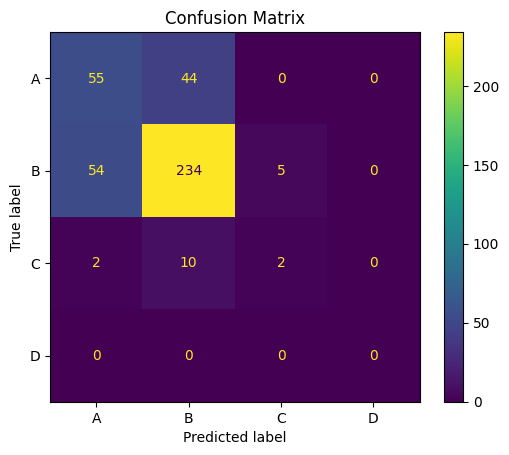

Accuracy: 0.7167487684729064


In [15]:
#4
print("Collapsed rating distribution:\n", y.value_counts())

# Drop the single 'D' entry
mask = y != 'D'
X = X[mask]
y = y[mask]

print("New class distribution:\n", y.value_counts())


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C', 'D'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C', 'D'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


The model predicts bond ratings with an overall accuracy of 71.7%, performing best on the most common class, B. However, it struggles with A and especially C, which are often misclassified as B due to class imbalance and overlapping features. Most errors occur between neighboring rating categories, which suggests the model captures general trends but lacks precision on less frequent classes.

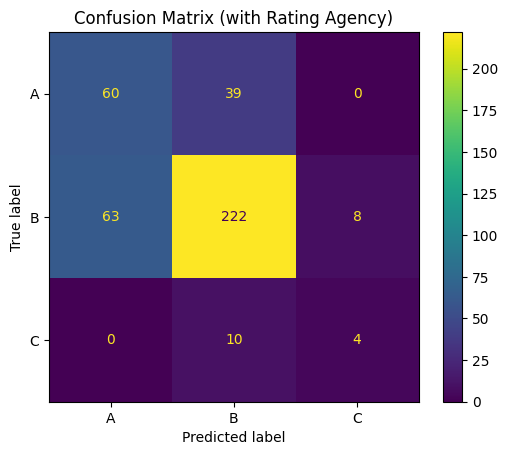

Accuracy with rating agency as feature: 0.7044334975369458


In [17]:
#5
df_agency = df.copy()
df_agency = df_agency[df_agency['RatingCollapsed'] != 'D']
df_agency['RatingCollapsed'] = df_agency['RatingCollapsed'].astype(str)

features_with_agency = df_agency.drop(columns=['Rating', 'Date', 'Name', 'Symbol'])
features_with_agency = pd.get_dummies(features_with_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

X_agency = features_with_agency.drop(columns=['RatingCollapsed'], errors='ignore')
y_agency = df_agency['RatingCollapsed']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_agency, y_agency, stratify=y_agency, test_size=0.2, random_state=42
)

tree2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree2.fit(X_train2, y_train2)
y_pred2 = tree2.predict(X_test2)

cm2 = confusion_matrix(y_test2, y_pred2, labels=['A', 'B', 'C'])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['A', 'B', 'C'])
disp2.plot()
plt.title('Confusion Matrix (with Rating Agency)')
plt.show()

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy with rating agency as feature:", accuracy2)


Including the rating agency as a feature slightly decreased the model’s accuracy from 71.7% to 70.4%. The confusion matrix also shows very similar misclassification patterns, suggesting that the rating agency variable did not significantly improve the model’s ability to distinguish between bond ratings. This result suggests that while rating agencies may differ slightly in how they rate, those differences aren't strongly predictive when business fundamentals are already included. It's also possible that any variation added by the agency is already reflected in the underlying financial metrics.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?